In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)


In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [9]:
# Display the row's columns and data in dictionary format
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1b315f3f9d0>,
 'station': 'USC00519397',
 'prcp': 0.08,
 'id': 1,
 'date': '2010-01-01',
 'tobs': 65.0}

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

Text(0.5, 0, 'Date')

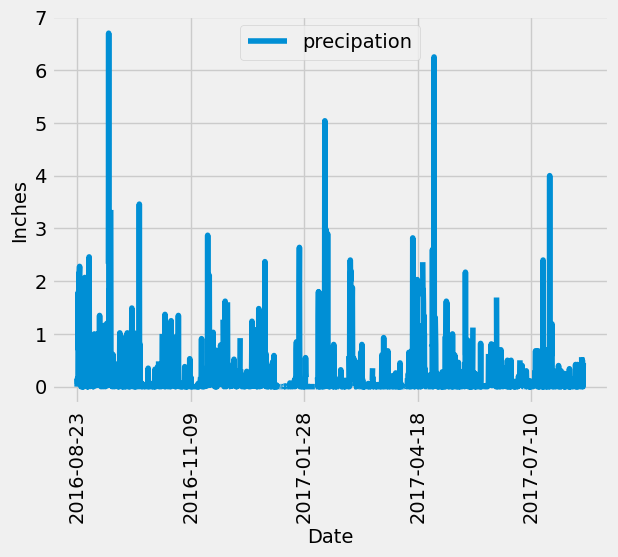

In [29]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores

wther = [Measurement.date,Measurement.prcp]
precp = session.query(*wther).\
filter(Measurement.date >= '2016-08-23').\
order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names

precip_df=pd.DataFrame(precp)
precip_df = precip_df.dropna()

precip_date = precip_df['date']
precip_precip = precip_df['prcp']
# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data

# The specific dates to display

# specific_dates = ['2016-08-23', '2016-11-09','2017-01-28', '2017-04-18', '2017-07-10']

# Create a list of indices for the specific dates
# specific_indices = [precip_date.tolist().index(date) for date in specific_dates]  #tolist() used for timepoints

# plt.xticks(specific_indices, specific_dates)

# plt.bar(precip_date,precip_precip, width = 4)
df= pd.DataFrame(precp,columns = ['date','precipation'])
df = df.sort_values("date")
df.plot(x="date", y="precipation", rot = 90)
plt.ylabel('Inches')
plt.xlabel('Date')
# plt.xticks(rotation=90)

# Set the specific dates as x-axis tick positions and labels

# plt.show()


In [30]:
# Use Pandas to calculate the summary statistics for the precipitation data
precip_df['prcp'].describe(include = object)

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64

# Exploratory Station Analysis

In [23]:
# Design a query to calculate the total number of stations in the dataset
(session.query(Station.station)).count()

9

In [22]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

statt = [Measurement.station, func.count(Measurement.station)]
station_count = session.query(*statt).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
station_count

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [21]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
statt = [func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)]
station_stat = session.query(*statt).\
     group_by(Measurement.station == 'USC00519281').\
     order_by((Measurement.station)).first()
    
station_stat

(54.0, 85.0, 71.66378066378067)

Text(0.5, 0, 'Temperature')

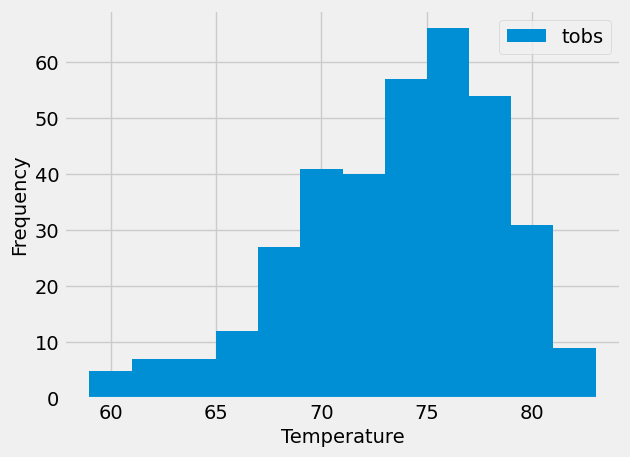

In [32]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
statt = [Measurement.date,Measurement.tobs]
station_temp = session.query(*statt).\
        filter(Measurement.date > '2016-08-18').\
        filter(Measurement.station == 'USC00519281').\
        group_by(Measurement.date).\
        order_by(Measurement.date).all()
station_temp_df=pd.DataFrame(station_temp)

station_temp_df.plot.hist(bins=12)
plt.xlabel('Temperature')


# Close Session

In [18]:
# Close Session
session.close()